## Join Example Database

In [ ]:
'''
select 
*
from users as u
join roles as r on r.id = u.id
;
'''

#### Join
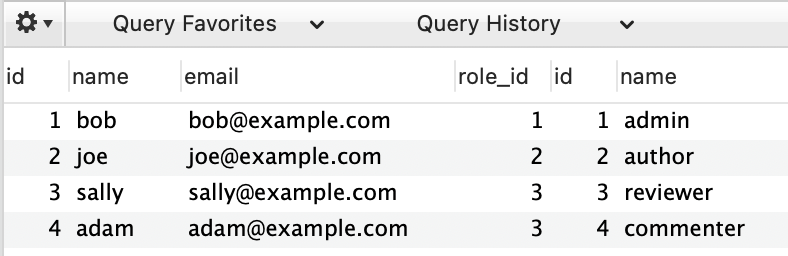

#### Left Join
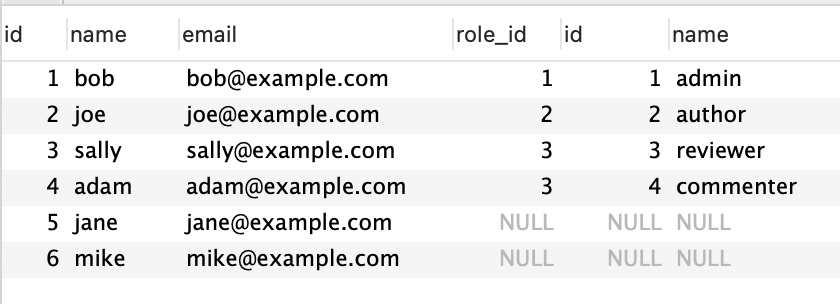

#### Right Join
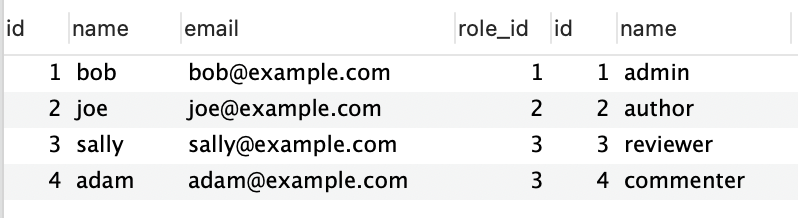

In [ ]:
'''
select 
r.name as role, sum(u.role_id) as role_count
from roles as r
join users as u on u.id = r.id
group by r.name
;
'''

    
## Employees Database

In [ ]:
'''
select
d.dept_name,concat(e.first_name, ' ', e.last_name) as full_name
from departments as d
join dept_manager as dm on dm.dept_no = d.dept_no
join employees as e on e.emp_no = dm.emp_no
where dm.to_date > curdate()
order by dept_name
;
'''

In [ ]:
'''
select
d.dept_name,concat(e.first_name, ' ', e.last_name) as full_name
from departments as d
join dept_manager as dm on dm.dept_no = d.dept_no
join employees as e on e.emp_no = dm.emp_no
where dm.to_date > curdate()
and e.gender = 'F'
order by dept_name
;
'''

In [ ]:
'''
select
t.title, count(ewd.emp_no)
from departments as d
join employees_with_departments as ewd on ewd.dept_no = d.dept_no
join titles as t on t.emp_no = ewd.emp_no where t.to_date > curdate()
and d.dept_no = 'd009'
group by t.title
;
'''

In [ ]:
'''
select
d.dept_name,concat(e.first_name, ' ', e.last_name) as full_name, s.salary
from departments as d
join dept_manager as dm on dm.dept_no = d.dept_no
join employees as e on e.emp_no = dm.emp_no 
join salaries as s on s.emp_no = e.emp_no 
where s.to_date > curdate() and dm.to_date > curdate()
order by d.dept_name
;
'''

In [ ]:
'''
select
d.dept_no, d.dept_name, count(de.emp_no) emp_count
from 
departments as d
join dept_emp as de on de.dept_no = d.dept_no
join salaries as s on s.emp_no = de.emp_no 
where de.to_date > curdate() and s.to_date > curdate()
group by d.dept_name
order by d.dept_no
;
'''

In [ ]:
'''
select
d.dept_name, AVG(s.salary) as avg_salary
from 
departments as d
join dept_emp as de on de.dept_no = d.dept_no
join salaries as s on s.emp_no = de.emp_no
where de.to_date > curdate() and s.to_date > curdate()
group by d.dept_no
order by max_salary desc
limit 1
;
'''

In [ ]:
'''
select
d.dept_name, s.salary, concat(e.first_name, " ", e.last_name) as full_name
from 
departments as d
join dept_emp as de on de.dept_no = d.dept_no
join salaries as s on s.emp_no = de.emp_no
join employees as e on e.emp_no = s.emp_no
where de.to_date > curdate() and s.to_date > curdate() and d.dept_no  = 'd001'
order by s.salary desc
limit 1
;
'''

In [ ]:
'''
select
concat(e.first_name, ' ', e.last_name) as full_name, s.salary, d.dept_name
from departments as d
join dept_manager as dm on dm.dept_no = d.dept_no
join employees as e on e.emp_no = dm.emp_no 
join salaries as s on s.emp_no = e.emp_no 
where s.to_date > curdate() and dm.to_date > curdate()
order by s.salary desc
limit 1
;
'''

In [ ]:
'''
select
concat(e.first_name, ' ', e.last_name) as full_name, 
d.dept_name,
manager.manager_name
from departments as d
join dept_emp as de on de.dept_no = d.dept_no
join employees as e on e.emp_no = de.emp_no 
join salaries as s on s.emp_no = e.emp_no
join
(
select concat(e.first_name, ' ', e.last_name) as manager_name
from employees as e
join dept_manager as dm on dm.emp_no = e.emp_no where dm.to_date > curdate()
) as manager 
where s.to_date > curdate() and de.to_date > curdate()
order by d.dept_name 
;
'''

In [ ]:
'''
select max_by_dept.dno, max_by_dept.dname, employees.first_name, employees.last_name, max_by_dept.maxsal, salaries.to_date   
from employees
join dept_emp on dept_emp.emp_no = employees.emp_no
join salaries on salaries.emp_no = dept_emp.emp_no
join (select dept_emp.dept_no as dno, departments.dept_name as dname, max(salary) as maxsal 
    from salaries
    join dept_emp on salaries.emp_no = dept_emp.emp_no
    join departments on departments.dept_no = dept_emp.dept_no
    join employees on employees.emp_no = salaries.emp_no
    group by dept_emp.dept_no) as max_by_dept on max_by_dept.dno = dept_emp.dept_no
where salaries.salary = max_by_dept.maxsal
order by max_by_dept.dno;
'''